In [1]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
import os
from datetime import datetime
from pathlib import Path

import pandas as pd
import numpy as np

import dask
from dask import dataframe as dd
import pyarrow as pa

data_path = Path(os.getcwd()).parent/"data"

# Use Pandas as reference for any diffrence in result

In [7]:
# Check Pandas <-> Dask datatype , operation
pdf = pd.read_csv(data_path/"split_aa")

array(['No', 'Yes'], dtype=object)

In [8]:
pdf.dtypes

User                int64
Card                int64
Year                int64
Month               int64
Day                 int64
Time               object
Amount             object
Use Chip           object
Merchant Name       int64
Merchant City      object
Merchant State     object
Zip               float64
MCC                 int64
Errors?            object
Is Fraud?          object
dtype: object

In [9]:
pdf.shape[0]

10000000

In [10]:
pdf["Errors?"].unique()

array([nan, 'Technical Glitch', 'Insufficient Balance', 'Bad PIN',
       'Bad PIN,Insufficient Balance', 'Bad Expiration',
       'Bad PIN,Technical Glitch', 'Bad Card Number', 'Bad CVV',
       'Bad Zipcode', 'Insufficient Balance,Technical Glitch',
       'Bad Card Number,Insufficient Balance', 'Bad Card Number,Bad CVV',
       'Bad CVV,Insufficient Balance', 'Bad Card Number,Bad Expiration',
       'Bad Expiration,Bad CVV', 'Bad Expiration,Insufficient Balance',
       'Bad Expiration,Technical Glitch',
       'Bad Card Number,Bad Expiration,Technical Glitch',
       'Bad CVV,Technical Glitch', 'Bad Card Number,Technical Glitch',
       'Bad Zipcode,Insufficient Balance', 'Bad Zipcode,Technical Glitch'],
      dtype=object)

In [11]:
pdf["Use Chip"].unique()

array(['Swipe Transaction', 'Online Transaction', 'Chip Transaction'],
      dtype=object)

In [12]:
pdf["Is Fraud?"].unique()

array(['No', 'Yes'], dtype=object)

# Reading CSV with Dask

In [79]:
ddf = dd.read_csv(data_path/"User0_credit_card_transactions.csv")
ddf.groupby("Year")["User"].count().compute()

Year
2002     329
2003    1074
2004    1176
2005    1127
2006    1120
2007    1111
2008    1163
2009    1119
2010    1123
2011    1113
2012    1169
2013    1139
2014    1183
2015    1182
2016    1119
2017    1180
2018    1190
2019    1164
2020     182
Name: User, dtype: int64

## Dask mechanic to for inferred datatype
- numeric with `null`
- string with `null`
- numeric range overflow
reference : https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html

In [28]:
!head ../data/test_no_issue.csv

User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,,No
0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,,No
0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,,No
0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,,No
0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,,No
0,0,2002,9,3,13:53,$86.19,Swipe Transaction,-7146670748125200898,Monterey Park,CA,91755.0,5970,,No
0,0,2002,9,4,05:51,$93.84,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,,No
0,0,2002,9,4,06:09,$123.50,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,,No
0,0,2002,9,5,06:14,$61.72,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,,No


In [35]:
# Read with Dask inferred
ddf = dd.read_csv(data_path/"test_no_issue.csv") 

In [36]:
ddf.dtypes

User                        int64
Card                        int64
Year                        int64
Month                       int64
Day                         int64
Time              string[pyarrow]
Amount            string[pyarrow]
Use Chip          string[pyarrow]
Merchant Name               int64
Merchant City     string[pyarrow]
Merchant State    string[pyarrow]
Zip                       float64
MCC                         int64
Errors?                   float64
Is Fraud?         string[pyarrow]
dtype: object

In [37]:
no_issue_pdf = ddf.dtypes.to_frame(name="no_issue")

__Data issue list__  
- Numeric `Card` with `Null`  
- String `Use Chip` with `Null`  
- Numeric `Merchant Name` with `int64` overflow

In [73]:
!head ../data/test_w_issue.csv

User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,,No
0,,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,,No
0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,,No
0,0,2002,9,5,06:14,$61.72,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,,No
0,0,2002,9,5,09:35,$57.10,Swipe Transaction,405525707848105870567889,La Verne,CA,91750.0,7538,,No
0,0,2002,9,5,20:18,$76.07,Swipe Transaction,-4500542936415012428,La Verne,CA,91750.0,5814,,No
0,0,2002,9,5,20:41,$53.91,Online Transaction,-9092677072201095172,ONLINE,,,4900,,No
0,0,2002,9,8,06:38,$27.75,,4060646732831064559,La Verne,CA,91750.0,5411,,No
0,0,2002,9,8,13:48,$76.57,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,,No


In [38]:
ddf = dd.read_csv(data_path/"test_w_issue.csv")

In [39]:
ddf.dtypes

User                        int64
Card                      float64
Year                        int64
Month                       int64
Day                         int64
Time              string[pyarrow]
Amount            string[pyarrow]
Use Chip          string[pyarrow]
Merchant Name     string[pyarrow]
Merchant City     string[pyarrow]
Merchant State    string[pyarrow]
Zip                       float64
MCC                         int64
Errors?                   float64
Is Fraud?         string[pyarrow]
dtype: object

In [40]:
w_issue_pdf = ddf.dtypes.to_frame(name="w_issue")

In [42]:
compare_pdf = pd.concat([no_issue_pdf, w_issue_pdf], axis=1)
compare_pdf

,no_issue,w_issue
User,int64,int64
Card,int64,float64
Year,int64,int64
Month,int64,int64
Day,int64,int64
Time,string[pyarrow],string[pyarrow]
Amount,string[pyarrow],string[pyarrow]
Use Chip,string[pyarrow],string[pyarrow]
Merchant Name,int64,string[pyarrow]
Merchant City,string[pyarrow],string[pyarrow]


__Numeric__
- Column `Card` with `Null` change to load as `int64` to load as `float64`
- Column `Merchant Name` with __Int64__ overflow, change from load as `int64` to load as `string`
__String__
- String type already support `Null`

## Test with defineded dtypes that conflict with Dask inferring mechanism

In [47]:
ddf = dd.read_csv(data_path/"test_w_issue.csv", 
                  dtype={"Card":"int64"})

ValueError: An error occurred while calling the read_csv method registered to the pandas backend.
Original Message: Integer column has NA values in column 1

__Numeric data__ with `Null` Dask detect `NA` and error

In [48]:
ddf = dd.read_csv(data_path/"test_w_issue.csv", 
                  dtype={"Merchant Name":"int64"})

OverflowError: An error occurred while calling the read_csv method registered to the pandas backend.
Original Message: Overflow

Numeric __Merchant Name__ with `Overflow`, Pandas identified as `Overflow`

## Special PyArrow datatype, `category`
- Convert Numerical -> Category
- Convert String -> Category

In [58]:
ddf = dd.read_csv(data_path/"test_no_issue.csv", 
                  dtype={"Card":"category"})
ddf.dtypes

User                        int64
Card                     category
Year                        int64
Month                       int64
Day                         int64
Time              string[pyarrow]
Amount            string[pyarrow]
Use Chip          string[pyarrow]
Merchant Name               int64
Merchant City     string[pyarrow]
Merchant State    string[pyarrow]
Zip                       float64
MCC                         int64
Errors?                   float64
Is Fraud?         string[pyarrow]
dtype: object

In [62]:
ddf = dd.read_csv(data_path/"test_w_issue.csv", 
                  dtype={"Card":"category"})
ddf.dtypes

User                        int64
Card                     category
Year                        int64
Month                       int64
Day                         int64
Time              string[pyarrow]
Amount            string[pyarrow]
Use Chip          string[pyarrow]
Merchant Name     string[pyarrow]
Merchant City     string[pyarrow]
Merchant State    string[pyarrow]
Zip                       float64
MCC                         int64
Errors?                   float64
Is Fraud?         string[pyarrow]
dtype: object

In [65]:
ddf["Card"].isna().sum().compute()

1

In [63]:
ddf["Card"].unique().compute()

0      0
1    NaN
Name: Card, dtype: category
Categories (1, object): ['0']

In [68]:
ddf["Card"].nunique().compute()

1

__`Category` data type__ 
- Support `Null` data and identified as `NaN`  
- Not count `Null` as `1` category  

In [69]:
ddf = dd.read_csv(data_path/"test_w_issue.csv", 
                  dtype={"Use Chip":"category"})
ddf.dtypes

User                        int64
Card                      float64
Year                        int64
Month                       int64
Day                         int64
Time              string[pyarrow]
Amount            string[pyarrow]
Use Chip                 category
Merchant Name     string[pyarrow]
Merchant City     string[pyarrow]
Merchant State    string[pyarrow]
Zip                       float64
MCC                         int64
Errors?                   float64
Is Fraud?         string[pyarrow]
dtype: object

In [70]:
ddf["Use Chip"].isna().sum().compute()

1

In [71]:
ddf["Use Chip"].nunique().compute()

2

In [72]:
ddf["Use Chip"].unique().compute()

0     Swipe Transaction
1    Online Transaction
2                   NaN
Name: Use Chip, dtype: category
Categories (2, object): ['Online Transaction', 'Swipe Transaction']

In [74]:
ddf["Use Chip"].count().compute()

8

In [76]:
ddf["Use Chip"].compute()

0     Swipe Transaction
1     Swipe Transaction
2     Swipe Transaction
3     Swipe Transaction
4     Swipe Transaction
5     Swipe Transaction
6    Online Transaction
7                   NaN
8     Swipe Transaction
Name: Use Chip, dtype: category
Categories (2, object): ['Online Transaction', 'Swipe Transaction']

## Auto parse dates type

Reading CSV with parese `Year`, `Month`, `Day` and `Time` to `dt`, and specific dtype for `Errors?` as str to support __NULL__ value

In [6]:
# Reading CSV convert date, and specific dt
ddf1 = dd.read_csv(
    data_path/"split_aa",
    parse_dates={"dt": [2, 3, 4, 5]},
    dtype={"Errors?": str}
)

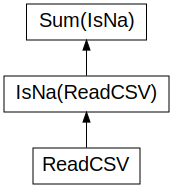

In [7]:
# Visualize compute graph
chk_null = ddf1.isna().sum()
chk_null.visualize()

In [8]:
chk_null.compute()

dt                      0
User                    0
Card                    0
Amount                  0
Use Chip                0
Merchant Name           0
Merchant City           0
Merchant State    1161291
Zip               1229064
MCC                     0
Errors?           9838028
Is Fraud?               0
dtype: int64

_parse_dates_ create column conflict, better avoid

In [9]:
ddf1["Use Chip"].unique().compute()

IndexError: An error occurred while calling the read_csv method registered to the pandas backend.
Original Message: list index out of range

In [10]:
ddf1["Errors?"].unique().compute()

IndexError: An error occurred while calling the read_csv method registered to the pandas backend.
Original Message: list index out of range

Check memory usage

In [19]:
ddf1.memory_usage(deep=True).compute()

Index                  1848
dt                 80000000
User               80000000
Card               80000000
Amount            549926712
Use Chip          658604480
Merchant Name      80000000
Merchant City     576296880
Merchant State    488289086
Zip                80000000
MCC                80000000
Errors?           325482745
Is Fraud?         510012013
dtype: int64

Specify all column dtype are more safe and memory efficient.  
- `string` -> `category`
- `int` -> `int16`  
Anyway, for data with Null, only suport type are `string`, `float64` or `category`

Also, with corrupted CSV, specify both column name and dtype could solve.   

In [11]:
# Incase of csv data have error rows, should 
# Specify column name & dtypes manually
# dtype 'category' also reduce amount of memory used
ddf_col = [
    "User",
    "Card",
    "Year",
    "Month",
    "Day",
    "Time",
    "Amount",
    "Use Chip",
    "Merchant Name",
    "Merchant City",
    "Merchant State",
    "Zip",
    "MCC",
    "Errors?",
    "Is Fraud?",
]

ddf_dtypes = {
    'User':'int16', 
    'Card':'int16',
    'Year':'int16',
    'Month':'int16', 
    'Day':'int16',
    'Time':'string', 
    'Amount':'string',
    'Use Chip':'category',
    'Merchant Name':'string',
    'Merchant City':'string',
    'Merchant State':'string',
    'Zip':'category',
    'MCC':'int16',
    'Errors?':'category',
    'Is Fraud?':'category',
}

In [12]:
# Use skiprows=1 for skipping header row
ddf1 = dd.read_csv(
    data_path/"split_aa",
    skiprows=1,
    names=ddf_col,
    dtype=ddf_dtypes,
)

In [13]:
ddf1["Use Chip"].unique().compute()

0     Swipe Transaction
0      Chip Transaction
0    Online Transaction
Name: Use Chip, dtype: category
Categories (3, object): ['Chip Transaction', 'Online Transaction', 'Swipe Transaction']

In [14]:
ddf1.memory_usage(deep=True).compute()

Index                  1848
User               20000000
Card               20000000
Year               20000000
Month              20000000
Day                20000000
Time              540000000
Amount            549926712
Use Chip           10003960
Merchant Name     684139678
Merchant City     576296880
Merchant State    516160070
Zip                29677488
MCC                20000000
Errors?            10024762
Is Fraud?          10001658
dtype: int64

In [15]:
ddf1.groupby(["Year", "Is Fraud?"], sort=True)["User"].nunique().compute()

Year  Is Fraud?
2002  No           179
2003  No           227
2004  No           279
2005  No           335
2006  No           390
2007  No           442
2008  No           506
2009  No           544
2010  No           578
2011  No           599
2012  No           602
2013  No           604
2014  No           610
2015  No           614
      Yes          156
2016  No           617
2017  No           615
2018  No           623
2019  No           650
2020  No           817
2016  Yes          309
2008  Yes          204
2019  Yes           93
2010  Yes          127
2006  Yes           99
2018  Yes           97
2013  Yes           65
2017  Yes           11
1999  No            67
2000  No            90
2001  No           126
      Yes           48
2014  Yes           38
2009  Yes           58
2007  Yes          107
2005  Yes           23
1998  No            41
2000  Yes           16
2012  Yes           69
2002  Yes            7
1996  No            15
1997  No            26
1999  Yes         

# Data manipulation

In [3]:
ddf1["Month"].unique().compute()

NameError: name 'ddf1' is not defined

In [ ]:
ddf1[["Day","Time"]].head()

,Day,Time
0,1,06:21
1,1,06:42
2,2,06:22
3,2,17:45
4,3,06:23


In [ ]:
ddf_clean = (ddf1
 .assign(dt_concat = lambda x : f'{x["Year"]} {x["Month"].astype("string").str.zfill(2)} {x["Day"].astype("string").str.zfill(2)} {x["Time"]}')
 .assign(dt = lambda x : pd.to_datetime(x["dt_concat"], format="%Y %m %d %H:%M"))
 .assign(amount = lambda x : x["Amount"].str.replace(',', '').str.replace('$', '').astype("float16"))
#  .drop(["Month", "Day", "Time", "dt_concat", "Amount"], axis=1)
)

In [ ]:
ddf_clean.head()

ValueError: Length of values (0) does not match length of index (5)

# Write Dask DataFrame as Parquet

Simple read csv, write parquet

In [141]:
parquet_path = data_path/"simple.parquet"
ddf = dd.read_csv(data_path/"split_aa", dtype={"Errors?":"string"})
print(f"CSV source - Division know : {ddf.known_divisions}, number of partition : {ddf.npartitions}")
ddf.to_parquet(parquet_path)

CSV srouce - Division know : False, number of partition : 14


In [188]:
parquet_path = data_path/"simple.parquet"

read_ddf = dd.read_parquet(parquet_path)
print(f"Division know : {read_ddf.known_divisions}, number of partition : {read_ddf.npartitions}")

Division know : False, number of partition : 14


In [189]:
os.listdir(parquet_path)
ddf = dd.read_parquet(parquet_path/"part.0.parquet")
ddf["Year"].nunique().compute()

23

Specifity index = "Year", also index will be dropped (move) to index of dataframe

In [148]:
parquet_path = data_path/"w_idx.parquet"
ddf = dd.read_csv(data_path/"split_aa", dtype={"Errors?":"string"})
print(f"CSV source - Division know : {ddf.known_divisions}, number of partition : {ddf.npartitions}")
ddf.set_index("Year", sort=True, drop=True).to_parquet(parquet_path, overwrite=True)

CSV source - Division know : False, number of partition : 14


In [181]:
parquet_path = data_path/"w_idx.parquet"
read_ddf = dd.read_parquet(parquet_path)
print(f"Division know : {read_ddf.known_divisions}, number of partition : {read_ddf.npartitions}")

Division know : False, number of partition : 14


In [178]:
os.listdir(parquet_path)

['part.7.parquet',
 'part.6.parquet',
 'part.8.parquet',
 'part.4.parquet',
 'part.5.parquet',
 'part.9.parquet',
 'part.3.parquet',
 'part.2.parquet',
 'part.12.parquet',
 'part.11.parquet',
 'part.10.parquet',
 'part.0.parquet',
 'part.13.parquet',
 'part.1.parquet']

In [183]:
ddf = dd.read_parquet(parquet_path/"part.0.parquet")
ddf.index.nunique().compute()

11

Dask save each parquet with sorted index, in each partition have already grouped index

In [ ]:
parquet_path = data_path/"w_idx.parquet"
ddf = dd.read_csv(data_path/"split_aa", dtype={"Errors?":"string"})
print(f"CSV source - Division know : {ddf.known_divisions}, number of partition : {ddf.npartitions}")
ddf.set_index("Year", sort=True, drop=True).to_parquet(parquet_path, overwrite=True)

In [ ]:
ddf = dd.read_csv(data_path/"split_aa", dtype={"Errors?":"string"})
print(f"CSV source - Division know : {ddf.known_divisions}, number of partition : {ddf.npartitions}")
ddf.to_parquet(data_path/"simple.parquet")

CSV srouce - Division know : False, number of partition : 14


# Write & Append Dask as Parquet

In [84]:
# Incase of csv data have error rows, should 
# Specify column name & dtypes manually
# dtype 'category' also reduce amount of memory used
ddf_col = [
    "User",
    "Card",
    "Year",
    "Month",
    "Day",
    "Time",
    "Amount",
    "Use Chip",
    "Merchant Name",
    "Merchant City",
    "Merchant State",
    "Zip",
    "MCC",
    "Errors?",
    "Is Fraud?",
]

ddf_dtypes = {
    'User':'int16', 
    'Card':'int16',
    'Year':'int16',
    'Month':'int16', 
    'Day':'int16',
    'Time':'string', 
    'Amount':'string',
    'Use Chip':'string',
    'Merchant Name':'string',
    'Merchant City':'string',
    'Merchant State':'string',
    'Zip':'float64',
    'MCC':'int16',
    'Errors?':'string',
    'Is Fraud?':'string',
}

Write and append into single .parquet directory, with no partition definition, and no division

In [17]:
parquet_path = data_path/"combined_no_p.parquet"

source_csv_path = Path(data_path).glob("split*")

for f in source_csv_path:
    print(f"Ingesting {f.name}")
    ddf = dd.read_csv(
        f,
        skiprows=1,
        names=ddf_col,
        dtype=ddf_dtypes,
    )
    # Data Cleaning
    ddf_clean = (ddf
    #  .assign(dt_concat = lambda x : f'{x["Year"]} {x["Month"].astype("string").str.zfill(2)} {x["Day"].astype("string").str.zfill(2)} {x["Time"]}')
    #  .assign(dt = lambda x : datetime.strptime(x["dt_concat"], "%Y %m %d %H:%M"))
     .assign(amount = lambda x : x["Amount"].str.replace(',', '').str.replace('$', '').astype("float16"))
    #  .drop(["Month", "Day", "Time", "dt_concat", "Amount"], axis=1)
    )
    # ddf_clean["dt"] = pd.to_datetime(ddf_clean["dt_concat"], format="%Y %m %d %H:%M")
    # ddf_clean.drop(["Month", "Day", "Time", "dt_concat", "Amount"], axis=1, inplace=True)
    
    if parquet_path.exists():
        ddf_clean.to_parquet(parquet_path, append=True, write_index=False)
    else:
        ddf_clean.to_parquet(parquet_path, write_index=False)

Ingesting split_aa
Ingesting split_ab
Ingesting split_ac


Without partition information from source (eg from CSV), Dask will automate chunk size as partitions

In [109]:
parquet_path = data_path/"combined_no_p.parquet"
len(os.listdir(parquet_path))

35

In [110]:
ddf = dd.read_parquet(parquet_path)
ddf.dtypes

User                        int16
Card                        int16
Year                        int16
Month                       int16
Day                         int16
Time              string[pyarrow]
Amount            string[pyarrow]
Use Chip          string[pyarrow]
Merchant Name     string[pyarrow]
Merchant City     string[pyarrow]
Merchant State    string[pyarrow]
Zip                       float64
MCC                         int16
Errors?           string[pyarrow]
Is Fraud?         string[pyarrow]
amount                    float16
dtype: object

In [111]:
ddf.npartitions

35

In [112]:
ddf.divisions

(None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None)

Write and append into single .parquet directory, with no partition definition, with index (division) setting on year
- command set_index = set partition on those columns
- When appending if hive already have 

In [88]:
parquet_path = data_path/"combined_no_p_w_div.parquet"

source_csv_path = Path(data_path).glob("split*")

for f in source_csv_path:
    print(f"Ingesting {f.name}")
    ddf = dd.read_csv(
        f,
        skiprows=1,
        names=ddf_col,
        dtype=ddf_dtypes,
    )
    # Data Cleaning
    ddf_clean = (ddf
     .assign(amount = lambda x : x["Amount"].str.replace(',', '').str.replace('$', '').astype("float16"))
    )
    
    if parquet_path.exists():
        ddf_clean.set_index(other="Year", sort=True).to_parquet(parquet_path, append=True, write_index=True)
    else:
        ddf_clean.set_index(other="Year", sort=True).to_parquet(parquet_path, write_index=True)

Ingesting split_aa
Ingesting split_ab


ValueError: The divisions of the appended dataframe overlap with previously written divisions. If this is desired, set ``ignore_divisions=True`` to append anyway.
- End of last written partition: {old_end}
- Start of first new partition: {divisions[0]}

In [113]:
parquet_path = data_path/"combined_no_p_w_div.parquet"
ddf = dd.read_parquet(parquet_path)
ddf.known_divisions

False

In [115]:
ddf.dtypes

User                        int16
Card                        int16
Month                       int16
Day                         int16
Time              string[pyarrow]
Amount            string[pyarrow]
Use Chip          string[pyarrow]
Merchant Name     string[pyarrow]
Merchant City     string[pyarrow]
Merchant State    string[pyarrow]
Zip                       float64
MCC                         int16
Errors?           string[pyarrow]
Is Fraud?         string[pyarrow]
amount                    float16
dtype: object

In [114]:
ddf.npartitions

14

In [117]:
ddf.index.nunique().compute()

30

Write and append into single .parquet directory, with `partition_on = Year`

In [124]:
parquet_path = data_path/"combined_wp_w_div.parquet"

source_csv_path = Path(data_path).glob("split*")

for f in source_csv_path:
    print(f"Ingesting {f.name}")
    ddf = dd.read_csv(
        f,
        skiprows=1,
        names=ddf_col,
        dtype=ddf_dtypes,
    )
    # Data Cleaning
    ddf_clean = (ddf
     .assign(amount = lambda x : x["Amount"].str.replace(',', '').str.replace('$', '').astype("float16"))
    )
    
    if parquet_path.exists():
        ddf_clean.set_index("Year", sort=True, drop=False).to_parquet(parquet_path, append=True, write_index=False, partition_on=["Year"])
    else:
        ddf_clean.set_index("Year", sort=True, drop=False).to_parquet(parquet_path, write_index=False, partition_on=["Year"])


Ingesting split_aa
Ingesting split_ab
Ingesting split_ac


In [125]:
parquet_path = data_path/"combined_wp_w_div.parquet"
ddf = dd.read_parquet(parquet_path)
ddf.known_divisions

False

In [126]:
ddf.npartitions

178

In [127]:
ddf.divisions

(None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [107]:
ddf.index.nunique().compute()

30

Test performance of partitioned vs non-partitioned

In [80]:
ddf_wp = dd.read_parquet(data_path/"combined.parquet")
ddf_np = dd.read_parquet(data_path/"combined_no_p.parquet")

In [85]:
%%timeit
ddf_wp["User"].nunique().compute()

1.66 s ± 25.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [86]:
%%timeit
ddf_np["User"].nunique().compute()

463 ms ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [87]:
%%timeit
ddf_wp.groupby("Year")["User"].nunique().compute()

3.27 s ± 263 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [88]:
%%timeit
ddf_np.groupby("Year")["User"].nunique().compute()

1.07 s ± 34.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [83]:
ddf_np.known_divisions

False